In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from extreme_classification.distributions import multivariate_logistic_distribution
import seaborn as sns
import matplotlib.pyplot as plt

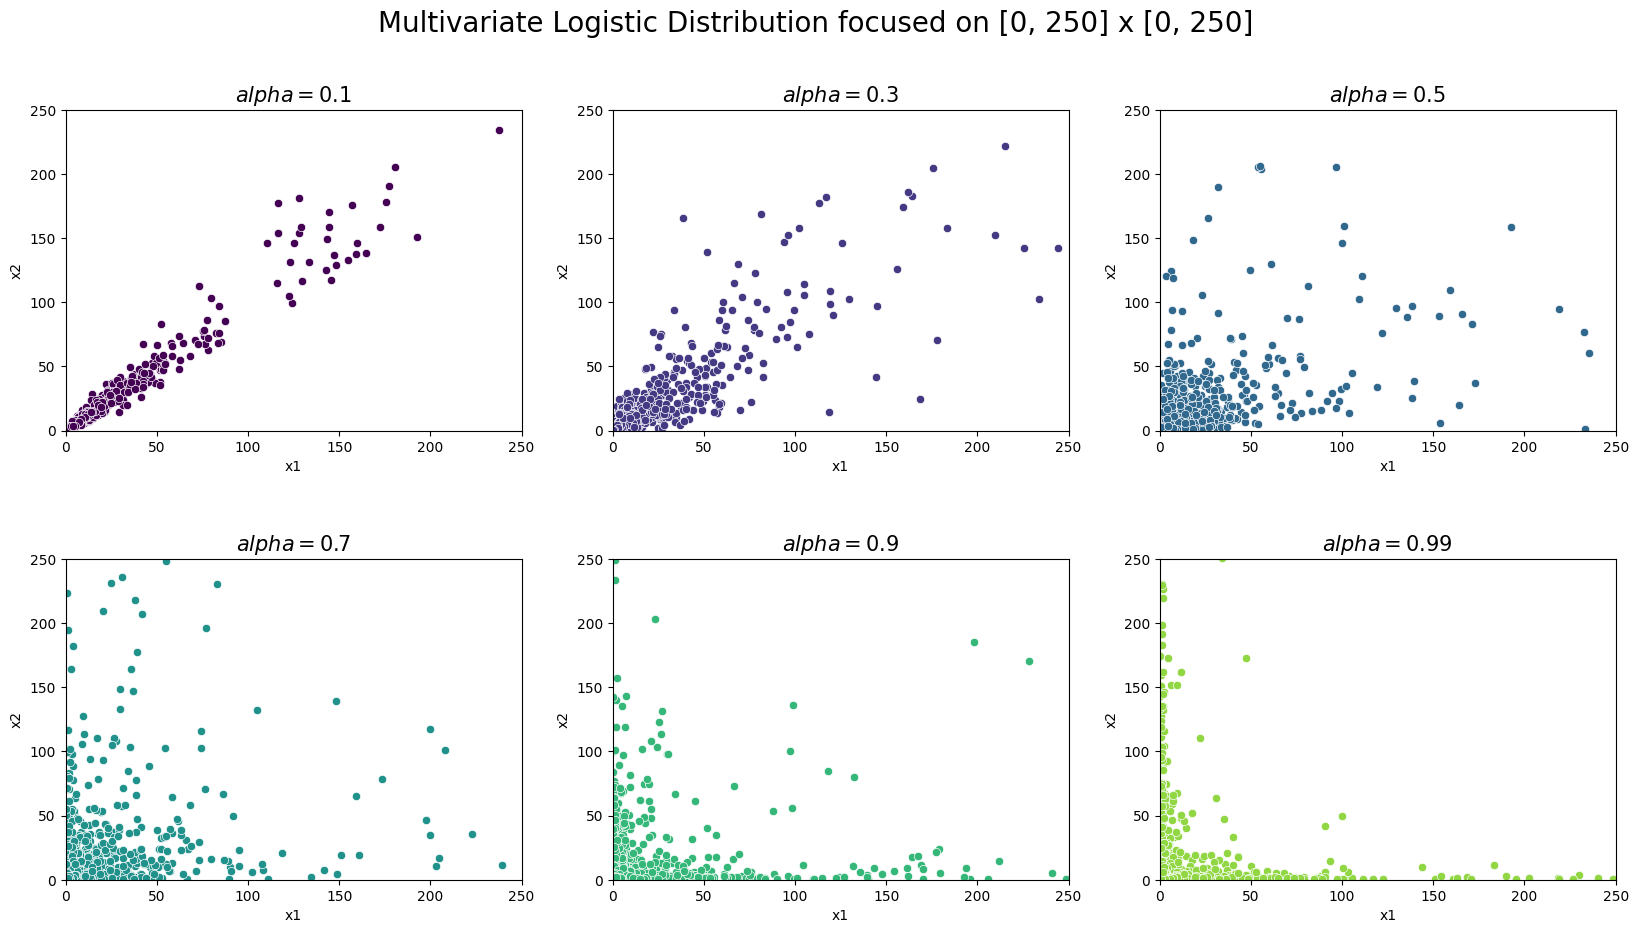

In [3]:
n_samples = 5000
dim = 2
alphas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]

plt.figure(figsize=(20, 10))
plt.suptitle("Multivariate Logistic Distribution focused on [0, 250] x [0, 250]", fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

colormap = plt.cm.viridis

for i, alpha in enumerate(alphas):
    plt.subplot(2, 3, i + 1)
    plt.xlim(0, 250)
    plt.ylim(0, 250)

    samples = multivariate_logistic_distribution(n_samples, dim, alpha)

    sns.scatterplot(x=samples[:, 0], y=samples[:, 1], color=colormap(i / len(alphas)))
    plt.title(f"$alpha = {alpha}$", fontsize=15)
    plt.xlabel("x1")
    plt.ylabel("x2")

In [4]:
from extreme_classification.extreme_dataset import BivariateLogisticDataset

train_dataset = BivariateLogisticDataset(
    sizes=[5000, 5000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
)

test_dataset = BivariateLogisticDataset(
    sizes=[50000, 50000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
)

C:\Users\Antoine\AppData\Local\Temp\ipykernel_123712\1817886550.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors, cmap=colormap, s=1)


Text(0.5, 1.0, 'Sample from the train dataset in [0, 120] x [0, 120]')

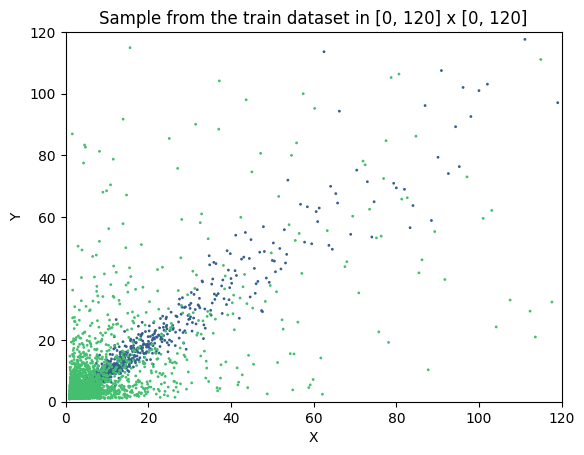

In [5]:
colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in train_dataset.labels]

plt.scatter(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors, cmap=colormap, s=1)
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')

In [6]:
k = 100
extreme_X, extreme_labels, boundary = train_dataset.get_extreme(k=k)

extreme_train_dataset = BivariateLogisticDataset.from_data(extreme_X, extreme_labels)


C:\Users\Antoine\AppData\Local\Temp\ipykernel_123712\3423512027.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors2, cmap=colormap, s=1)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_123712\3423512027.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_train_dataset.X[:, 0], extreme_train_dataset.X[:, 1], c=colors1, cmap=colormap, s=1)


Text(0.5, 1.0, 'Sample from the train dataset in [0, 120] x [0, 120]')

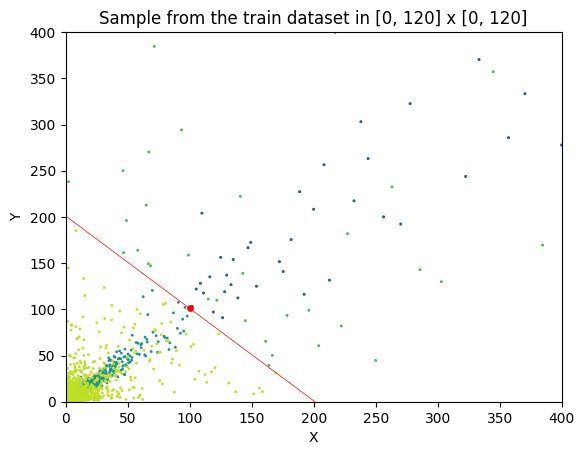

In [7]:
colors1 = [colormap(0.3) if label == 0 else colormap(0.7) for label in extreme_train_dataset.labels]
colors2 = [colormap(0.5) if label == 0 else colormap(0.9) for label in train_dataset.labels]

plt.scatter(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors2, cmap=colormap, s=1)
plt.scatter(extreme_train_dataset.X[:, 0], extreme_train_dataset.X[:, 1], c=colors1, cmap=colormap, s=1)
plt.plot([0, boundary["norm"]], [boundary["norm"], 0], color="red", linewidth=0.5)
plt.scatter(boundary[0], boundary[1], color="red", s=15, marker="o")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')

In [8]:
kappas = [0.5, 1, 1.5]

In [9]:
extreme_test_dataset = test_dataset.make_extreme(norm=boundary["norm"])
extreme_test_dataset_2 = test_dataset.make_extreme(norm=boundary["norm"] * (1 + kappas[0]))
extreme_test_dataset_3 = test_dataset.make_extreme(norm=boundary["norm"] * (1 + kappas[1]))


In [10]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

print(f"Train extreme dataset size: {len(extreme_train_dataset)}")
print(f"Test extreme dataset size: {len(extreme_test_dataset)}")
print(f"Test extreme dataset 2 size: {len(extreme_test_dataset_2)}")
print(f"Test extreme dataset 3 size: {len(extreme_test_dataset_3)}")

Train dataset size: 10000
Test dataset size: 100000
Train extreme dataset size: 101
Test extreme dataset size: 1010
Test extreme dataset 2 size: 659
Test extreme dataset 3 size: 500


C:\Users\Antoine\AppData\Local\Temp\ipykernel_123712\2031490835.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_test_dataset.X[:, 0], extreme_test_dataset.X[:, 1], c=colors, cmap=colormap, s=1)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_123712\2031490835.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_test_dataset_2.X[:, 0], extreme_test_dataset_2.X[:, 1], c=colors2, cmap=colormap2, s=1)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_123712\2031490835.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_test_dataset_3.X[:, 0], extreme_test_dataset_3.X[:, 1], c=colors3, cmap=colormap3, s=1)


Text(0.5, 1.0, 'Sample from the train dataset in [0, 120] x [0, 120]')

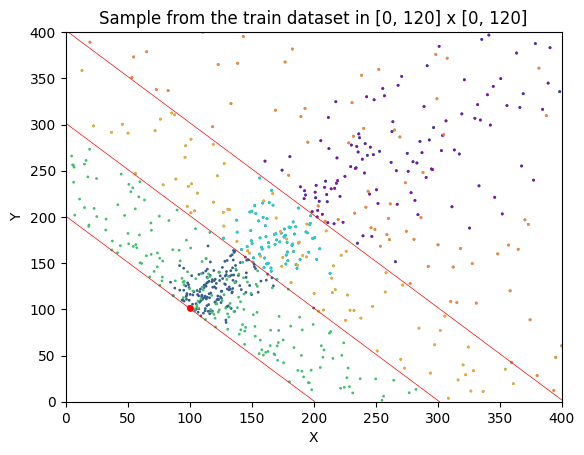

In [11]:
colormap2 = plt.cm.turbo
colormap3 = plt.cm.plasma


colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in extreme_test_dataset.labels]
colors2 = [colormap2(0.3) if label == 0 else colormap2(0.7) for label in extreme_test_dataset_2.labels]
colors3 = [colormap3(0.3) if label == 0 else colormap3(0.7) for label in extreme_test_dataset_3.labels]

plt.scatter(extreme_test_dataset.X[:, 0], extreme_test_dataset.X[:, 1], c=colors, cmap=colormap, s=1)
plt.scatter(extreme_test_dataset_2.X[:, 0], extreme_test_dataset_2.X[:, 1], c=colors2, cmap=colormap2, s=1)
plt.scatter(extreme_test_dataset_3.X[:, 0], extreme_test_dataset_3.X[:, 1], c=colors3, cmap=colormap3, s=1)
plt.plot([0, boundary["norm"]], [boundary["norm"], 0], color="red", linewidth=0.5)
plt.plot([0, (1+kappas[0])*boundary["norm"]], [(1+kappas[0])*boundary["norm"], 0], color="red", linewidth=0.5)
plt.plot([0, (1+kappas[1])*boundary["norm"]], [(1+kappas[1])*boundary["norm"], 0], color="red", linewidth=0.5)
plt.scatter(boundary[0], boundary[1], color="red", s=15, marker="o")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')